In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/PatternLab/test-Minimum-Error-Rate-Classifier-2.txt', sep = ',', header = None)
print(df)

   0    1
0  1  1.0
1  1 -1.0
2  4  5.0
3 -2  2.5
4  0  2.0
5  2 -3.0


In [7]:
df = np.array(df)

meu1 = np.array([0, 0])
meu2 = np.array([2, 2])

In [8]:
mat1 = np.array([[.25, .3],
                 [.3,  1]])

mat2 = np.array([[.5, 0],
                 [0, .5]])

In [9]:
p_omega1 = 0.5
p_omega2 = 0.5

In [10]:
def calculate_likelihood(d, mat, mu, X):
  a1 = (X - mu)
  a2 = np.transpose(a1)
  a3 = np.linalg.inv(mat)

  a = np.dot(a2, a3)
  a = np.dot(a, a1)
  a = -0.5*a
  a = np.exp(a)

  b1 = (2*np.pi)**d
  b2 = np.linalg.det(mat)
  b = np.sqrt(b1*b2)

  return a/b

In [11]:
class_1 = []
class_2 = []
dim = df.shape[1]

for i in df:
  X = np.array([i[0], i[1]])
  likelihood_1 = calculate_likelihood(dim, mat1, meu1, X) * p_omega1
  likelihood_2 = calculate_likelihood(dim, mat2, meu2, X) * p_omega2
  if(likelihood_1 > likelihood_2):
    class_1.append(X)
    print(X, 'class 1')
  else:
    class_2.append(X)
    print(X, 'class 2')

[1. 1.] class 1
[ 1. -1.] class 1
[4. 5.] class 2
[-2.   2.5] class 2
[0. 2.] class 1
[ 2. -3.] class 2


In [12]:
class_1 = pd.DataFrame(class_1)
class_2 = pd.DataFrame(class_2)

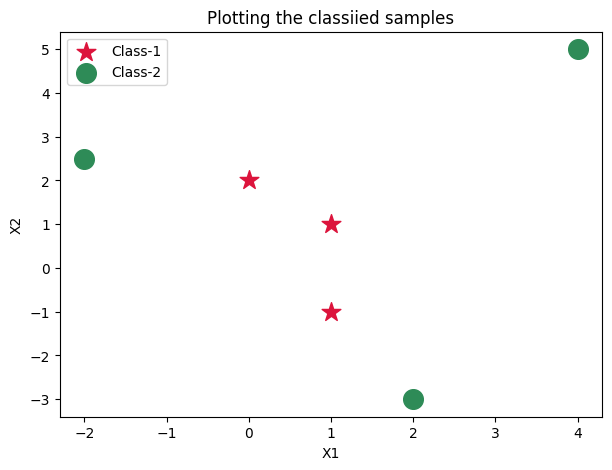

In [13]:
plt.figure(figsize = (7, 5))
plt.title('Plotting the classiied samples')
plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(class_1[0],class_1[1], s=200, color='crimson', marker = '*', label='Class-1')
plt.scatter(class_2[0],class_2[1], s=200, color='seagreen', marker = 'o', label='Class-2')
plt.legend()

In [14]:
# Preparing data for contour of normal distribution

x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)

Z1 = np.zeros((1000, 1000))
Z2 = np.zeros((1000, 1000))

for i in range(len(x)):
  for j in range(len(y)):
    p1 = calculate_likelihood(dim, mat1, meu1, np.array([x[i], y[j]]) ) * p_omega1
    p2 = calculate_likelihood(dim, mat2, meu2, np.array([x[i], y[j]]) ) * p_omega2


    Z1[i][j] = p1
    Z2[i][j] = p2

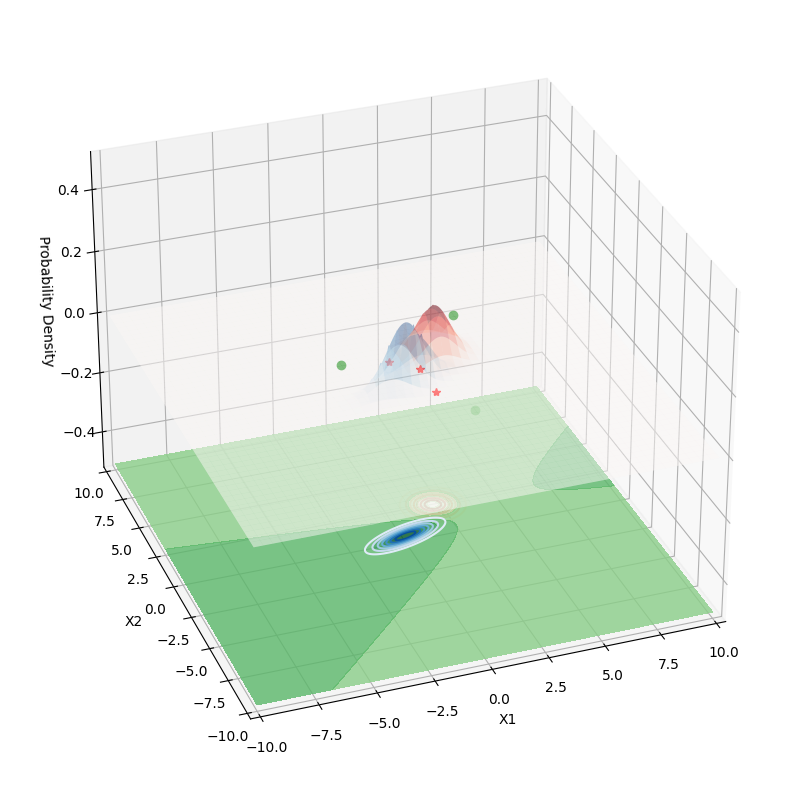

In [26]:
decision_boundary = Z1-Z2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z1,cmap='Blues',linewidth=0,alpha=0.3)
ax.plot_surface(X, Y, Z2,cmap='Reds',linewidth=0,alpha=0.3)


ax.plot(class_1[0], class_1[1], 'r*', label= 'Class 1')
ax.plot(class_2[0], class_2[1], 'go', label= 'Class 2')

ax.contour(X, Y, Z1, zdir= 'z', offset= -0.5, cmap= 'Blues')
ax.contour(X, Y, Z2, zdir= 'z', offset= -0.5, cmap= 'Reds')

ax.contourf(X, Y, decision_boundary, zdir='z', offset=-0.5, alpha=0.8, cmap ='Greens')

ax.set_zlim(-0.5, 0.5)
ax.set_xlim(10, -10)
ax.set_ylim(10, -10)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
ax.view_init(30, 70)

plt.show()
plt.show()